# DNN Classification
Compare the performance of logistic regression to a DNN Classifier on a non-linear dataset

In [37]:
#imports
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import statsmodels.api as sm

## Prepare Data

In [126]:
#Create a random dataset 
n_points = 1000

x1 = np.linspace(-10,10,n_points)
np.random.shuffle(x1) #Shuffle data so X1 and X2 are not correlated
print(x1)

x2= np.linspace(-10,10,n_points)
print(x2)

noise = np.random.randn(n_points)
print(noise)

[  2.85285285   0.09009009   4.59459459   2.09209209   6.33633634
  -3.87387387   6.23623624  -6.87687688   5.77577578  -7.0970971
   5.27527528  -7.8978979   -6.37637638  -9.1991992   -4.57457457
   9.11911912   0.69069069  -2.29229229   8.61861862  -0.71071071
  -5.95595596  -4.09409409   6.35635636  -3.25325325  -1.27127127
   1.81181181   9.37937938   3.25325325  -8.25825826  -1.53153153
   5.25525526  -6.35635636   1.13113113  -6.41641642  -7.43743744
  -5.5955956    7.11711712   2.51251251   0.73073073   5.93593594
  -4.25425425  -0.91091091  -1.77177177   3.17317317   3.09309309
   6.07607608  -2.87287287   7.05705706   9.33933934   3.61361361
  -0.99099099  -9.97997998   7.31731732   6.83683684   1.97197197
  -8.43843844  -2.43243243  -5.995996     5.35535536   1.09109109
   8.1981982    6.57657658   5.03503504   0.77077077  -5.91591592
  -7.23723724   8.31831832   8.77877878   1.49149149  -3.27327327
   4.37437437  -8.65865866  -5.81581582  -5.83583584  -6.05605606
   2.152152

In [127]:
y_fun = (0.5 * x1) -5*(x2) + x1**2 + 2*x1*x2 + 5 + noise
y_true = [1 if y>=0 else 0 for y in y_fun] 

data = pd.concat([pd.DataFrame(data=x1,columns=['X1']),pd.DataFrame(data=x2,columns=['X2']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
print(sum(data['Y']))
data.head()

716


,X1,X2,Y
0,2.852853,-10.00000,1
1,0.090090,-9.97998,1
2,4.594595,-9.95996,0
3,2.092092,-9.93994,1
4,6.336336,-9.91992,0


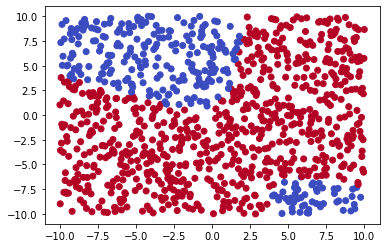

In [130]:
plt.scatter(data['X1'],data['X2'],c=data['Y'],cmap='coolwarm',alpha = 1)

In [19]:
## Logistic Regression

In [131]:
X = data[['X1','X2']]
x_train, x_test, y_train, y_test = train_test_split(X,y_true,test_size=0.3, random_state = 101)

log_model = sm.Logit(y_train,x_train).fit(disp=0)

print(log_model)
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  700
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Apr 2020   Pseudo R-squ.:                -0.05857
Time:                        21:47:05   Log-Likelihood:                -440.37
converged:                       True   LL-Null:                       -416.01
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.0759      0.014      5.350      0.000       0.048       0.104
X2            -0.1082      0.015     -7.389      0.000      -0.137      -0.079


In [98]:
predictions = np.around(log_model.predict(x_test))
accuracy_score(y_test,predictions) 

0.6533333333333333

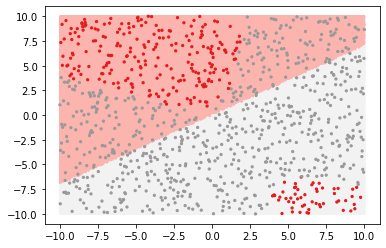

In [132]:
n_points = 1000000

x1_boundary = np.linspace(-10,10,n_points)
np.random.shuffle(x1_boundary)
x2_boundary= np.linspace(-10,10,n_points)
np.random.shuffle(x2_boundary)

plot_data = pd.concat([pd.DataFrame(data=x1_boundary,columns=['X1']),pd.DataFrame(data=x2_boundary,columns=['X2'])],axis=1)

y_boundary = np.around(log_model.predict(plot_data))

plt.scatter(plot_data['X1'],plot_data['X2'],c=y_boundary,cmap='Pastel1',alpha =1,s=1)
plt.scatter(data['X1'],data['X2'],c=data['Y'],cmap='Set1',alpha = 1, s=5)

### Add transformations and interactions


In [133]:
data['X3'] = x1**2
data['X4'] = x1*x2

In [134]:
X = data[['X1','X2','X3','X4']]
x_train, x_test, y_train, y_test = train_test_split(X,y_true,test_size=0.3, random_state = 101)

log_model = sm.Logit(y_train,x_train).fit(disp=0)

print(log_model)
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Sun, 05 Apr 2020   Pseudo R-squ.:                  0.9201
Time:                        21:47:27   Log-Likelihood:                -33.221
converged:                       True   LL-Null:                       -416.01
Covariance Type:            nonrobust   LLR p-value:                1.265e-165
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.5207      0.132      3.947      0.000       0.262       0.779
X2            -2.5255      0.421     -6.005      0.000      -3.350      -1.701
X3             0.5998      0.099      6.034      0.0

In [135]:
predictions = np.around(log_model.predict(x_test))
accuracy_score(y_test,predictions) 

0.9866666666666667

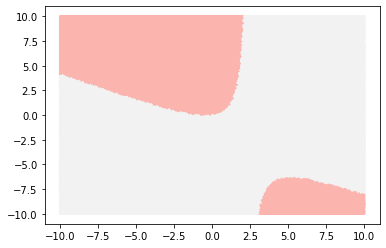

In [136]:
plot_data['X3'] = plot_data['X1']**2
plot_data['X4'] = plot_data['X1']*plot_data['X2']

y_boundary = np.around(log_model.predict(plot_data))

plt.scatter(plot_data['X1'],plot_data['X2'],c=y_boundary,cmap='Pastel1',alpha =1,s=1)
#plt.scatter(data['X1'],data['X2'],c=data['Y'],cmap='Set1',alpha = 1, s=5)